In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
# Use pandas_profiling to perform EDA
profile = ProfileReport(df, title='Pandas profile report', explorative=True)

In [4]:
profile.to_widgets()

In [5]:
profile.to_file('output.html')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company,company_state,same_state,age,python,r,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\r\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\r\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\r\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\r\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\r\n,NY,1,22,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company', 'company_state', 'same_state', 'age', 'python',
       'r', 'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

#remove new line from job title

In [6]:
## Job title and seniority 
df['job_simplify'] = df['Job Title'].apply(title_simplifier)
df.job_simplify.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simplify, dtype: int64

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [8]:
##  Fix state Los Angeles 
# df.company_state.value_counts()
# We have los angeles as a state so we need to fix that
df['company_state'] = df.company_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['company_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
IN     10
WI     10
UT     10
MO      9
AZ      9
AL      8
DE      6
GA      6
MI      6
KY      6
IA      5
CT      5
LA      4
NE      4
OR      4
NM      3
KS      3
MN      2
ID      2
SC      1
RI      1
Name: company_state, dtype: int64

In [9]:
##  Job description length 
df['desc_length'] = df['Job Description'].apply(lambda x: len(x))
df.desc_length

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_length, Length: 742, dtype: int64

In [10]:
##  Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [11]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [12]:
## hourly wage to annual 
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis=1)

In [13]:
df[['hourly', 'min_salary', 'max_salary']][df.hourly==1]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [14]:
# Remove \n from company column
df.company = df.company.apply(lambda x: x.replace('\r\n', ''))

In [15]:
df.company

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company, Length: 742, dtype: object

In [16]:
df.describe()

,Rating,Founded,hourly,employer_provided_salary,min_salary,max_salary,avg_salary,same_state,age,python,r,spark,aws,excel,desc_length,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company', 'company_state', 'same_state', 'age', 'python',
       'r', 'spark', 'aws', 'excel', 'job_simplify', 'seniority',
       'desc_length', 'num_comp'],
      dtype='object')

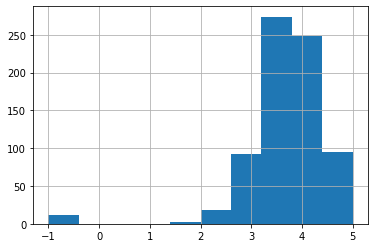

In [18]:
df.Rating.hist()

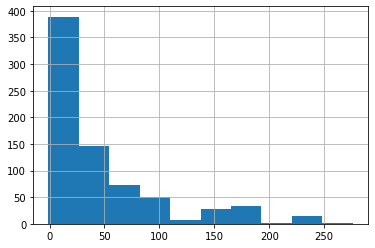

In [19]:
df.age.hist()

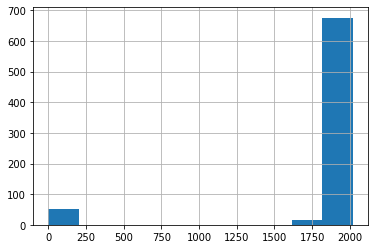

In [20]:
df.Founded.hist()

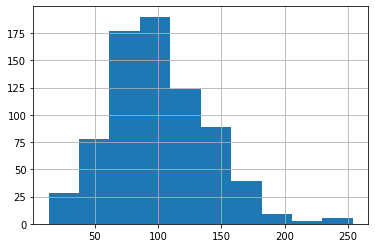

In [21]:
df.avg_salary.hist()

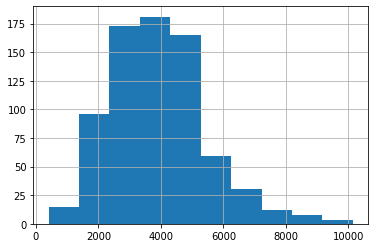

In [22]:
df.desc_length.hist()

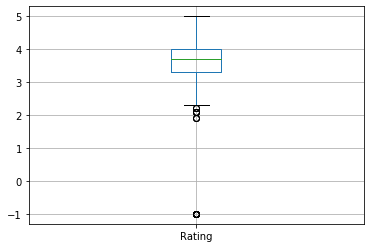

In [23]:
df.boxplot(column='Rating')

In [24]:
df.corr()

,Rating,Founded,hourly,employer_provided_salary,min_salary,max_salary,avg_salary,same_state,age,python,r,spark,aws,excel,desc_length,num_comp
Rating,1.000000,0.332927,-0.019531,-0.468234,-0.009573,0.027344,0.013492,0.085033,0.021655,0.144665,-0.004472,0.156982,0.117049,-0.036466,-0.012631,0.027190
Founded,0.332927,1.000000,0.049313,-0.312761,-0.033999,0.006776,-0.015149,0.171512,0.134682,0.103183,0.016045,0.066978,-0.011123,-0.035567,0.081953,0.191265
hourly,-0.019531,0.049313,1.000000,0.124748,-0.203556,-0.276730,-0.356082,-0.067351,0.007626,-0.193487,-0.009505,-0.098530,-0.030315,-0.099897,-0.073133,-0.117265
employer_provided_salary,-0.468234,-0.312761,0.124748,1.000000,0.187591,0.028794,0.076287,-0.081349,-0.109288,-0.107924,-0.007961,-0.082524,-0.000685,0.074129,-0.102974,-0.116665
min_salary,-0.009573,-0.033999,-0.203556,0.187591,1.000000,0.940136,0.967765,-0.051097,0.003110,0.326910,-0.042349,0.164671,0.168893,-0.075234,0.059591,0.076004
max_salary,0.027344,0.006776,-0.276730,0.028794,0.940136,1.000000,0.986862,-0.032784,0.034395,0.301481,-0.041587,0.171317,0.170911,-0.067175,0.074987,0.086195
avg_salary,0.013492,-0.015149,-0.356082,0.076287,0.967765,0.986862,1.000000,-0.034641,0.019655,0.327796,-0.040000,0.176559,0.171379,-0.057252,0.078093,0.093813
same_state,0.085033,0.171512,-0.067351,-0.081349,-0.051097,-0.032784,-0.034641,1.000000,-0.166680,0.006975,-0.058407,-0.053139,-0.065070,0.106026,0.061830,-0.102635
age,0.021655,0.134682,0.007626,-0.109288,0.003110,0.034395,0.019655,-0.166680,1.000000,-0.099160,-0.016533,-0.102788,-0.033081,0.039033,0.165090,0.126687
python,0.144665,0.103183,-0.193487,-0.107924,0.326910,0.301481,0.327796,0.006975,-0.099160,1.000000,0.049124,0.347619,0.203221,-0.021519,0.019102,0.091470


In [25]:
df[['age', 'avg_salary', 'Rating','desc_length']].corr()

,age,avg_salary,Rating,desc_length
age,1.000000,0.019655,0.021655,0.165090
avg_salary,0.019655,1.000000,0.013492,0.078093
Rating,0.021655,0.013492,1.000000,-0.012631
desc_length,0.165090,0.078093,-0.012631,1.000000


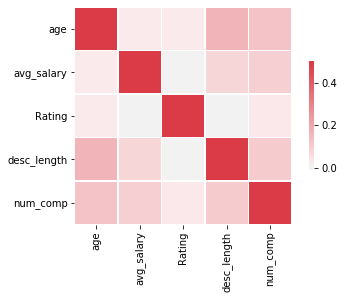

In [26]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'avg_salary', 'Rating','desc_length', 'num_comp']].corr(), vmax=0.5,center=0, 
            cmap=cmap, square=True, linewidths=.5, cbar_kws={'shrink': 0.5})

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company', 'company_state', 'same_state', 'age', 'python',
       'r', 'spark', 'aws', 'excel', 'job_simplify', 'seniority',
       'desc_length', 'num_comp'],
      dtype='object')

In [28]:
df_categorical = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company', 'company_state', 'same_state', 'age', 'python',
       'r', 'spark', 'aws', 'excel', 'job_simplify', 'seniority']]

Graph for Location: Total = 200


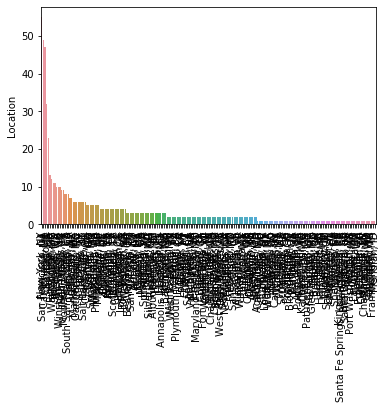

Graph for Headquarters: Total = 198


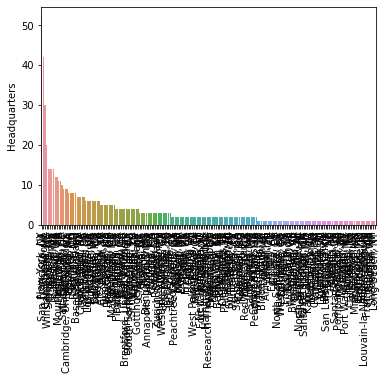

Graph for Size: Total = 9


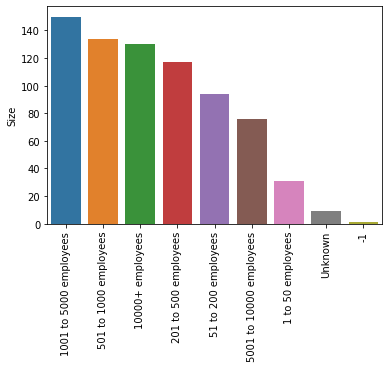

Graph for Type of ownership: Total = 11


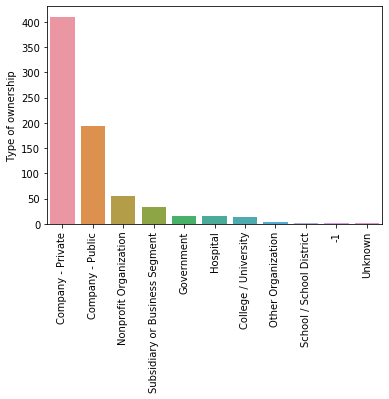

Graph for Industry: Total = 60


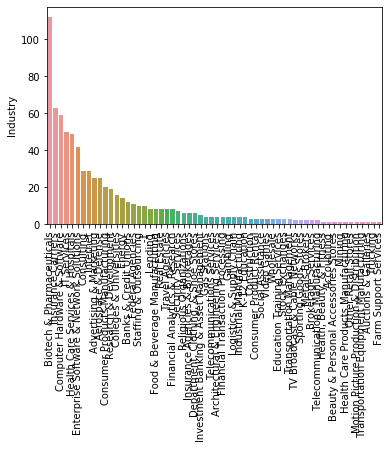

Graph for Sector: Total = 25


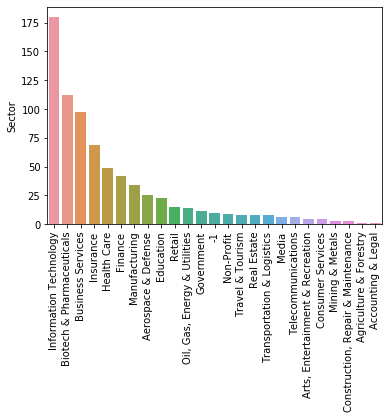

Graph for Revenue: Total = 14


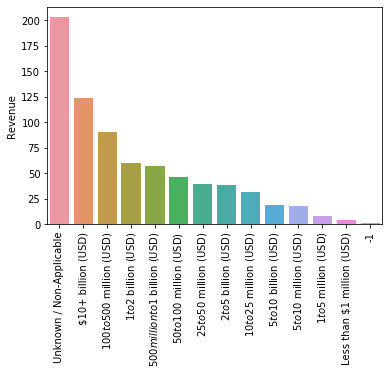

Graph for company: Total = 343


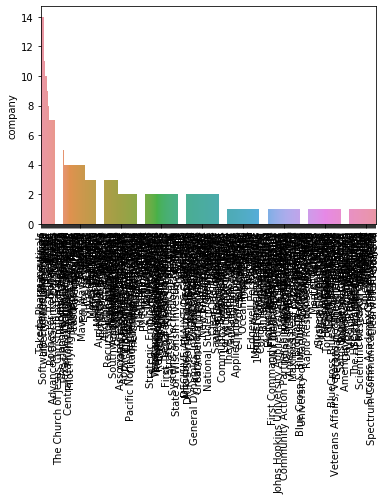

Graph for company_state: Total = 37


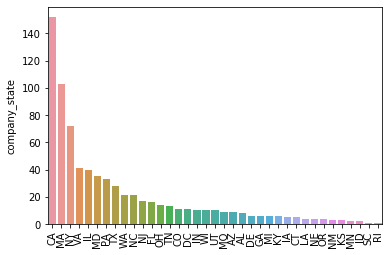

Graph for same_state: Total = 2


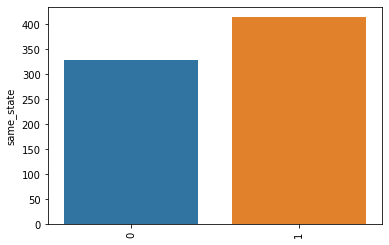

Graph for age: Total = 102


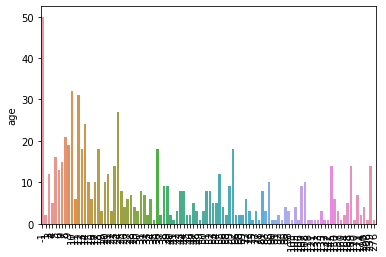

Graph for python: Total = 2


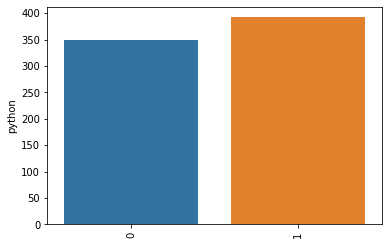

Graph for r: Total = 2


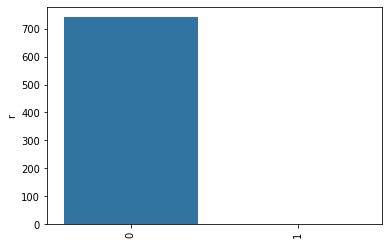

Graph for spark: Total = 2


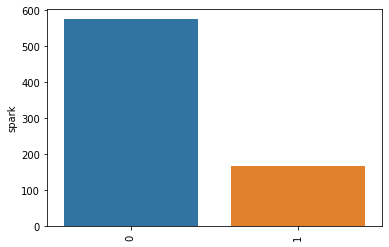

Graph for aws: Total = 2


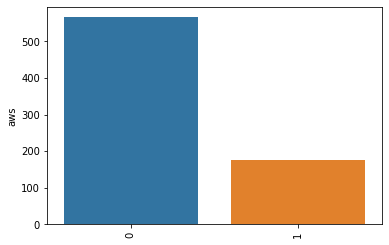

Graph for excel: Total = 2


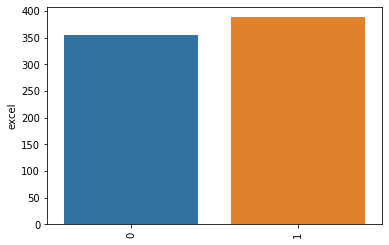

Graph for job_simplify: Total = 7


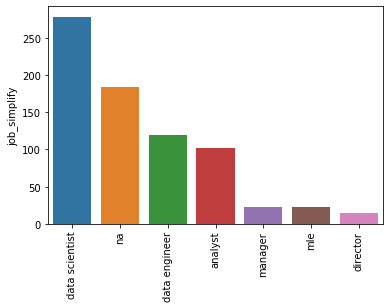

Graph for seniority: Total = 3


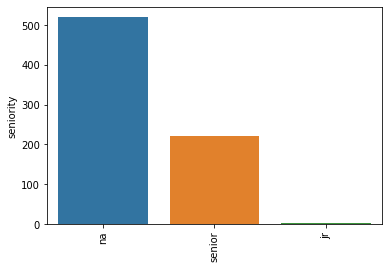

In [29]:
#Bar plot for the above data for each column

for i in df_categorical.columns:
    numbers = df_categorical[i].value_counts()
    print('Graph for %s: Total = %d' % (i, len(numbers)))
    chart = sns.barplot(x=numbers.index, y = numbers)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: Total = 20


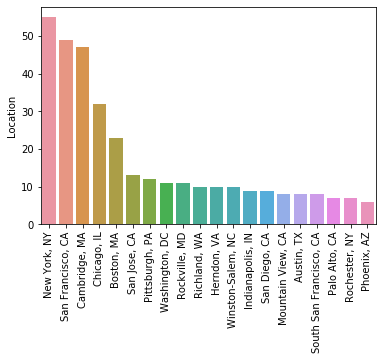

Graph for Headquarters: Total = 20


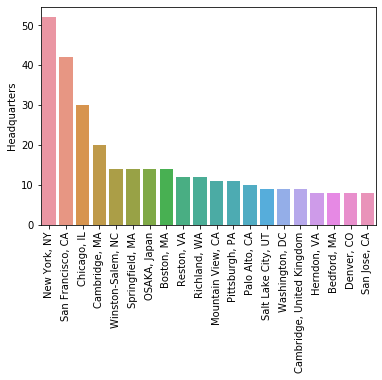

Graph for company: Total = 20


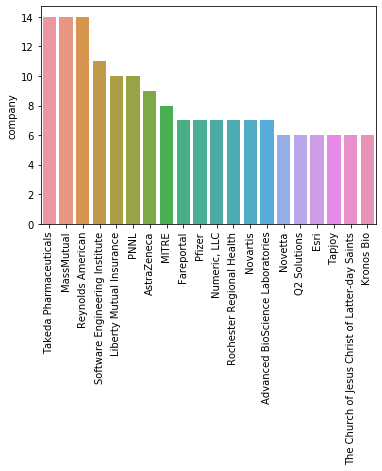

In [30]:
#Bar plot for the above data for each column

for i in df_categorical[['Location', 'Headquarters', 'company']].columns:
    numbers = df_categorical[i].value_counts()[:20]
    print('Graph for %s: Total = %d' % (i, len(numbers)))
    chart = sns.barplot(x=numbers.index, y = numbers)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [31]:
#Pivot table
df.columns
# df['job_simplify'].describe()

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company', 'company_state', 'same_state', 'age', 'python',
       'r', 'spark', 'aws', 'excel', 'job_simplify', 'seniority',
       'desc_length', 'num_comp'],
      dtype='object')

In [32]:
pd.pivot_table(df, index='job_simplify', values="avg_salary")

,avg_salary
job_simplify,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [33]:
pd.pivot_table(df, index=['job_simplify', 'seniority'], values="avg_salary")

avg_salary
job_simplify   seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [34]:
# View state wise avg_salary
pd.pivot_table(df, index='company_state', values="avg_salary").sort_values('avg_salary', ascending=False)

,avg_salary
company_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [35]:
# Find out what state hires which role and the avg_salary for that
pd.set_option('display.max_rows', None) #Use this to view all the rows
'''aggfuncfunction, list of functions, dict, default numpy.mean
If list of functions passed, the resulting pivot table will have hierarchical columns whose top level 
are the function names (inferred from the function objects themselves) 
If dict is passed, the key is column to aggregate and value is function or list of functions.'''
pd.pivot_table(df, index=['company_state', 'job_simplify'], values="avg_salary", aggfunc='count').sort_values('company_state', ascending=False)

avg_salary
company_state job_simplify              
WI            na                       4
              data scientist           3
              analyst                  3
WA            na                       1
              data scientist          17
              analyst                  3
VA            na                       5
              mle                      2
              data scientist          18
              data engineer           10
              analyst                  6
UT            data engineer            3
              analyst                  4
              data scientist           3
TX            na                       7
              data scientist          13
              data engineer            8
TN            data scientist           1
              data engineer           10
              analyst                  2
SC            na                       1
RI            analyst                  1
PA            manager                  3
              data engineer            1
              data scientist           6
              analyst                  8
              mle                      7
              na                       8
OR            data scientist           3
              data engineer            1
OH            na                       3
              data scientist           7
              analyst                  4
NY            na                      12
              mle                      2
              data scientist          40
              data engineer            4
              analyst                 14
NM            data scientist           3
NJ            data scientist           4
              analyst                  6
              data engineer            2
              manager                  2
              director                 2
              na                       1
NE            na                       4
NC            na                      12
              data scientist           3
              data engineer            6
MO            na                       3
              manager                  1
              data scientist           3
              analyst                  2
MN            data engineer            1
              analyst                  1
MI            manager                  2
              data scientist           4
MD            na                      16
              data scientist          13
              data engineer            3
              analyst                  3
MA            na                      46
              manager                  5
              director                 6
              data scientist          30
              data engineer           12
              analyst                  4
LA            analyst                  1
              data engineer            2
              na                       1
KY            na                       4
              data scientist           2
KS            mle                      3
IN            na                       4
              data scientist           2
              data engineer            4
IL            analyst                  3
              na                       6
              mle                      2
              director                 6
              data scientist          15
              data engineer            8
ID            analyst                  2
IA            analyst                  2
              data engineer            3
GA            data scientist           3
              na                       3
FL            data scientist           7
              data engineer            3
              analyst                  6
DE            na                       6
DC            data scientist           5
              data engineer            4
              analyst                  2
CT            na                       3
              data scientist           2
CO          

In [36]:
# Data scientist salary only
pd.pivot_table(df[df.job_simplify=='data scientist'], index=['company_state'], values="avg_salary", aggfunc='count').sort_values('company_state', ascending=False)

,avg_salary
company_state,
WI,3
WA,17
VA,18
UT,3
TX,13
TN,1
PA,6
OR,3
OH,7


In [37]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company', 'company_state', 'same_state', 'age', 'python',
       'r', 'spark', 'aws', 'excel', 'job_simplify', 'seniority',
       'desc_length', 'num_comp'],
      dtype='object')

In [38]:
# 'Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided_salary','python','r', 'spark', 'aws', 'excel', 'desc_length','Type of ownership' 

In [39]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided_salary','python','r', 'spark', 'aws', 'excel','Type of ownership', 'seniority','min_salary','avg_salary']]

In [40]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values=['min_salary', 'avg_salary']).sort_values('min_salary', ascending=False))

Rating
        avg_salary  min_salary
Rating                        
 5.0    134.700000  123.000000
-1.0    136.181818  118.727273
 2.5    120.000000   92.500000
 4.1    116.368421   92.315789
 4.5    117.714286   86.142857
 3.9    113.071429   83.968254
 4.4    108.606061   78.848485
 4.0    105.340426   78.659574
 3.2    105.500000   78.400000
 3.7    104.131148   77.983607
 3.3    101.858974   77.435897
 3.5    104.897959   76.918367
 4.7    103.983871   76.322581
 2.6    109.083333   75.583333
 4.2    100.442308   74.461538
 4.3    102.468750   74.281250
 2.2     97.750000   72.500000
 4.6     97.250000   72.100000
 3.8     96.811475   71.704918
 3.4     93.011364   68.454545
 3.6     85.467391   65.326087
 2.1     95.900000   65.200000
 3.0     85.588235   63.588235
 4.8     80.277778   63.444444
 1.9     87.500000   62.333333
 2.8     83.928571   60.714286
 3.1     86.580000   59.600000
 2.3     81.500000   59.500000
 2.7     83.250000   57.357143
 2.9     81.138889   53.888889
 

     avg_salary  min_salary
aws                        
1    112.559659   84.096591
0     96.915194   71.803887
excel
       avg_salary  min_salary
excel                        
0      102.953390   77.158192
1       98.502577   72.494845
Type of ownership
                                avg_salary  min_salary
Type of ownership                                     
-1                              117.500000  100.000000
Company - Public                110.893782   81.813472
Subsidiary or Business Segment  110.573529   80.558824
Company - Private               101.776829   75.517073
College / University            107.615385   74.615385
Government                       84.300000   64.066667
School / School District         77.750000   56.500000
Other Organization               77.500000   55.666667
Nonprofit Organization           68.281818   53.145455
Hospital                         54.000000   45.866667
Unknown                          39.500000   29.000000
seniority
           avg_sala

ValueError: Grouper for 'min_salary' not 1-dimensional

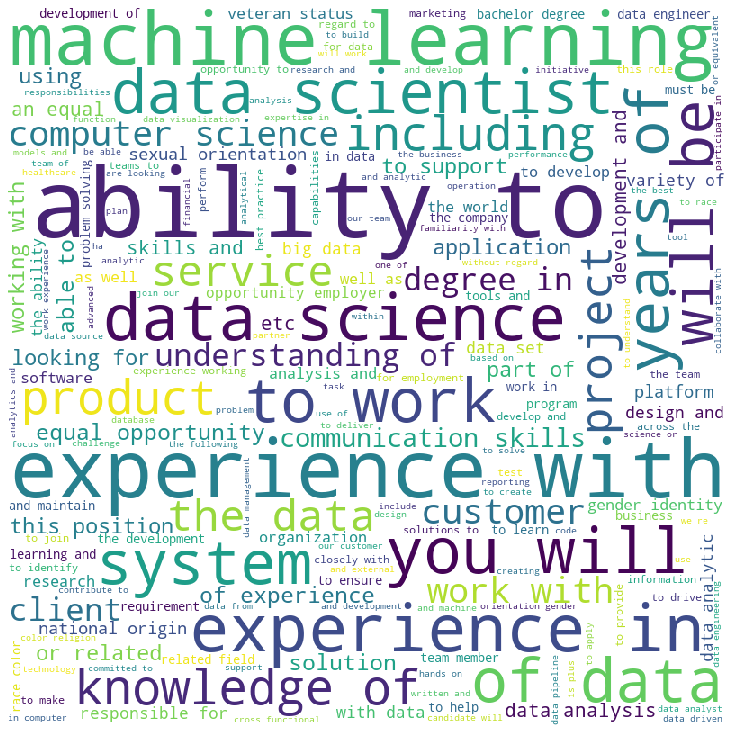

In [41]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords=set(STOPWORDS)

for val in df['Job Description']:
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, random_state=1,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [42]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
# import nltk
# nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

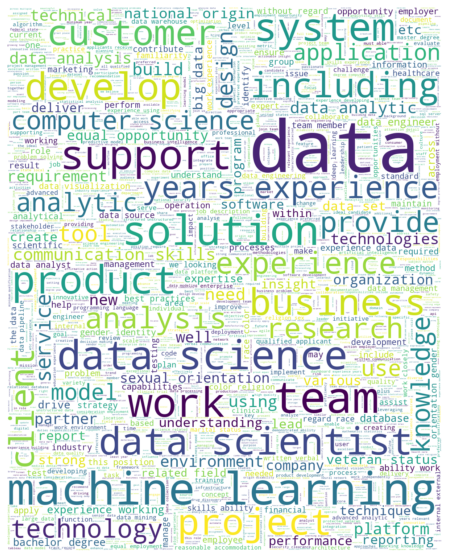

In [43]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
# remove punctuation and stop words
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for word in word_tokens:
        if word not in stop_words and word.isalpha():
            filtered.append(word.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([element for element in words_filtered])

wordcld = WordCloud(background_color='white', random_state=1, stopwords=STOPWORDS, max_words=2000, width=1200, height=1500)
wordcld.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcld, interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
df.to_csv('eda_data.csv', index=False)